<a href="https://colab.research.google.com/github/helenross636/magic_season/blob/main/%23Task17.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
import matplotlib.pyplot as plt
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras import layers
import time
from collections import defaultdict

In [3]:
# Устанавливаем seed для повторяемости результатов
np.random.seed(42)
# Загружаем данные
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Преобразование размерности изображений
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
# Нормализация данных
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# Преобразуем метки в категории
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

11501568/11490434 [==============================] - 0s 0us/step


In [6]:
model3 = keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/models/seed(42)/model3.h5')
w5000 = (model3.layers[3].kernel)
print(w5000.shape)

(5000, 10)


# #TASK 17

In [7]:
(y,z) = w5000.shape
am = np.zeros((y,y))
am = abs(np.corrcoef(w5000))
np.fill_diagonal(am, 0)
print('матрица по метрике корелляции: ',am.shape)

матрица по метрике корелляции:  (5000, 5000)


***Вспоминаем приближение***

4427


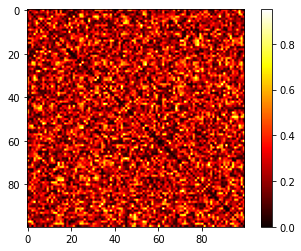

In [9]:
plt.imshow(am[:100, :100], cmap='hot')
plt.colorbar()

nn = [i for i, a in enumerate(am) if np.sum(a > 0.9) != 0]
print(len(nn))

**Фиксируем понимание**

Ранее строилась маска по матрице коэф корелляции > 0.9 (например). Потом начиналость рассмотрение каждой строки. Если в ней находились элементы с меткой `True`, то среди них искалось наибольшее значение в исходной матрице. И по индексу столбца `(nk)` исходной матрицы определялся ключ, в который записывался каждый индекс строки`(idx)`. В итоге, ключами становятся только наибольшие индексы столбцов `(nk[np.argmax(am[idx, nk])]`), а словами - все индексы строк `(idx)`. 


In [49]:
#Готовим словарь
mask = am > -0.1
print('Проверка размерности маски: ', mask.shape)

similar5 = defaultdict(list)
count = 0;  #сколько "нейронов-слов"
for idx, k in enumerate(mask):
  nk = k.nonzero()[0]
  if len(nk) != 0:
    similar5[idx].append(nk[np.argmax(am[idx, nk])])
    count+=1
  else:
    print(idx)

print('Длина пар ключей: ',len(similar5))
print('count = ', count)

Проверка размерности маски:  (5000, 5000)
Длина пар ключей:  5000
count =  5000


In [ ]:
similar5

  
  for idx, k in enumerate(mask):  #до длины маски (по количеству нейронов на скрытом слое)
    #k - значение маски (true или false)
    nk = k.nonzero()[0] #возвращает индекс элементa массива
    if len(nk) != 0:  #если значение было не ЛОЖЬ и nk имеет значение индекса
      #первый элемент пары - индекс нейрона, второй - из матрицы corrcoef
      similar[idx] = nk[np.argmax(am[idx,nk])]
      #print('test')
      #print(idx) #индекс нейрона
      #print(nk)  #индекс нейрона
      #print(nk[np.argmax(am[idx,nk])]) #максимальное значение в этих индексах? они ведь не более 0.7. ИЛИ...
                                        #ЭТО ИНДЕКС ВТОРОГО НЕЙРОНА ИЗ ПАРЫ НАИБОЛЕЕ ПОХОЖИХ? они зеркальны.


In [41]:
mask = am > 0.9
similar = defaultdict(list)
count = 0;  #сколько нейронов надо будет удалять из сети 5к
for idx, k in enumerate(mask):
  nk = k.nonzero()[0]
  if len(nk) != 0:
    similar[nk[np.argmax(am[idx, nk])]].append(idx)

#similar

In [44]:
similar_reverse = defaultdict(list)
for key, values in similar.items():  # .iteritems() in Python 2
    for value in values:
        similar_reverse[value].append(key)

similar_reverse

defaultdict(list,
            {0: [4283],
             2528: [4283],
             4820: [4283],
             1: [807],
             2: [2432],
             4719: [2432],
             3: [2811],
             4: [2094],
             1372: [2094],
             1427: [2094],
             5: [3035],
             6: [3611],
             7: [2152],
             9: [1325],
             1016: [1325],
             1109: [1325],
             10: [572],
             11: [865],
             12: [2341],
             13: [1741],
             14: [656],
             15: [3796],
             16: [3074],
             722: [3074],
             18: [3124],
             19: [2251],
             20: [3954],
             21: [4423],
             24: [2365],
             25: [2365],
             2338: [2365],
             2451: [2365],
             26: [801],
             1943: [801],
             27: [3509],
             28: [3646],
             29: [3770],
             4895: [3770],
             30: [855],


In [37]:
mask = am > 0.9
similar = defaultdict(list)
count = 0;  #сколько нейронов надо будет удалять из сети 5к
for idx, k in enumerate(mask):
  nk = k.nonzero()[0]
  print(nk)
  if len(nk) != 0:
    similar[nk[np.argmax(am[idx, nk])]].append(idx)
    print('am[idx, nk]', am[idx, nk], '(idx = ',idx,', nk = ',nk,', nk[np.argmax(am[idx, nk])] = ',nk[np.argmax(am[idx, nk])],')')

[4283]
am[idx, nk] [0.91920403] (idx =  0 , nk =  [4283] , nk[np.argmax(am[idx, nk])] =  4283 )
[ 807  860 1939 2155 2476 2838 3458 3621]
am[idx, nk] [0.95460385 0.90874748 0.93680685 0.91766664 0.91189942 0.92899173
 0.94698624 0.90083838] (idx =  1 , nk =  [ 807  860 1939 2155 2476 2838 3458 3621] , nk[np.argmax(am[idx, nk])] =  807 )
[ 612  897 1067 2262 2432 3315 4455 4506 4736]
am[idx, nk] [0.93654839 0.91637304 0.90091053 0.92894861 0.94605535 0.91269729
 0.90002973 0.91109687 0.92907496] (idx =  2 , nk =  [ 612  897 1067 2262 2432 3315 4455 4506 4736] , nk[np.argmax(am[idx, nk])] =  2432 )
[ 376  928 1305 1690 1711 2133 2332 2544 2669 2805 2811 3060 3310 4612]
am[idx, nk] [0.90498676 0.9383547  0.93987454 0.93535883 0.90536333 0.90071089
 0.94427721 0.93384646 0.90041375 0.90790031 0.94666026 0.93290655
 0.90293186 0.9340118 ] (idx =  3 , nk =  [ 376  928 1305 1690 1711 2133 2332 2544 2669 2805 2811 3060 3310 4612] , nk[np.argmax(am[idx, nk])] =  2811 )
[1372 1427 2094]
am[idx, 

KeyboardInterrupt: ignored